KNN - Predicting weather a person is diabetic or not  

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score

In [2]:
df  = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#While going through the dataset I saw there are some 0 values in  columns like BloodPressure, that cant be true,
#we'll just remove it

In [4]:
zero_not_accepted = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]

In [5]:
for col in zero_not_accepted:
    
    df[col] = df[col].replace(0,np.NaN)
    mean = int(df[col].mean(skipna=True))
    df[col] = df[col].fillna(mean)

In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,155.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,155.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,155.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [7]:
inputs = df.drop(columns="Outcome")
target = df["Outcome"]

X_train,X_test,y_train,y_test = train_test_split(inputs,target,test_size=0.2)

In [8]:
(len(X_train),len(X_test))

(614, 154)

In [9]:
#before training our model we need to scale it down to desired scale

In [10]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [11]:
#Now we are ready to use a ML Algo. In this case we are gonna use KNN Algo

In [12]:
# finding the value for K. We know sqrt of no of entries in our data set can be good value of K

In [13]:
import math

In [14]:
math.sqrt(len(y_test))

12.409673645990857

In [15]:
# therefore as we dont use a even value for K the next best value for K will be int(Sqrt(n)) - 1 (in our case == 11)

In [16]:
model = KNeighborsClassifier(n_neighbors=11,p=2,metric="euclidean")

In [17]:
# p==2 because we can have only 2 types of outcome 0 or 1 (diabetic or not diabetic)

In [18]:
model.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [19]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0],
      dtype=int64)

In [20]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[82,  9],
       [26, 37]], dtype=int64)

Text(-3.0, 0.5, 'Actual Value')

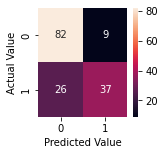

In [21]:
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize=(2,2))
sn.heatmap(cm,annot=True)
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")

In [22]:
accuracy_score(y_test,y_pred)

0.7727272727272727

In [23]:
f1_score(y_test,y_pred)

0.6788990825688073